## 1. Tools for text processing
<p><img style="float: right ; margin: 5px 20px 5px 10px; width: 45%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/PrideAndPrejudiceTitlePage.jpg/330px-PrideAndPrejudiceTitlePage.jpg"> </p>
<<p>What are the most frequent words in Jane Austen's novel, *Pride and Prejudice*, and how often do they occur?</p>
<p>In this notebook, we'll scrape the novel <em>Pride and Prejudice</em> from the website <a href="https://www.gutenberg.org/">Project Gutenberg</a> (which contains a large corpus of books) using the Python package <code>requests</code>. Then we'll extract words from this web data using <code>BeautifulSoup</code>. Finally, we'll dive into analyzing the distribution of words using the Natural Language ToolKit (<code>nltk</code>).</p>
<p>The <em>Data Science pipeline</em> we'll build in this notebook can be used to visualize the word frequency distributions of any novel that you can find on Project Gutenberg. The natural language processing tools used here apply to much of the data that data scientists encounter as a vast proportion of the world's data is unstructured data and includes a great deal of text.</p>
<p>Let's start by loading in the three main Python packages we are going to use.</p>

In [2]:
# Importing requests, BeautifulSoup, and nltk for web scraping and text processing
import requests
import nltk
from bs4 import BeautifulSoup

# Downloading the nltk stopwords and punkt tokenizer
nltk.download('punkt')
nltk.download('stopwords')

# You can also initialize any other nltk resources here if needed.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dipti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dipti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Request Pride and Prejudice
<p>To analyze *Pride and Prejudice*, we need to get the contents of the novel from <em>somewhere</em>. Luckily, the text is freely available online at Project Gutenberg as an HTML file: https://www.gutenberg.org/files/1342/1342-h/1342-h.htm.</p>
<p><strong>Note</strong> that HTML stands for Hypertext Markup Language and is the standard markup language for the web.</p>
<p>To fetch the HTML file with *Pride and Prejudice* we're going to use the <code>requests</code> package to make a <code>GET</code> request for the website, which means we're <em>getting</em> data from it. This is what you're doing through a browser when visiting a webpage, but now we're getting the requested page directly into Python instead.</p>

In [3]:
# Getting the Pride and Prejudice HTML 
r = requests.get('https://www.gutenberg.org/files/1342/1342-h/1342-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[0:2000])


<!DOCTYPE html>
<html lang="en">
  <head>
<link rel="icon" href="images/cover.jpg" type="image/x-cover">

<meta charset="utf-8">

<title>
  The Project Gutenberg eBook of Pride and prejudice, by Jane Austen.
</title>
<style>

a:link {background-color:#ffffff;color:blue;text-decoration:none;}

  link {background-color:#ffffff;color:blue;text-decoration:none;}

a:visited {background-color:#ffffff;color:purple;text-decoration:none;}

a:hover {background-color:#ffffff;color:#FF0000;text-decoration:underline;}

.blk {page-break-before:always;page-break-after:always;
margin:2em auto;}

.cbig250 {text-align:center;text-indent:0%;font-weight:normal;
font-size:200%;}

body{margin-left:4%;margin-right:6%;background:#ffffff;color:black;font-family:"Times New Roman", serif;font-size:medium;}

.blockquot {margin-top:2%;margin-bottom:2%;}

.c {text-align:center;text-indent:0%;}

.caption  {font-weight:normal;}
.caption p{font-size:75%;text-align:center;text-indent:0%;}

.fint {text-align:center;text

## 3. Get the text from the HTML
<p>This HTML is not quite what we want. However, it does <em>contain</em> what we want: the text of <em>Pride and Prejudice</em>. What we need to do now is <em>wrangle</em> this HTML to extract the text of the novel. For this, we'll use the package <code>BeautifulSoup</code>.</p>
<p>Firstly, a word on the name of the package: Beautiful Soup? In web development, the term "tag soup" refers to structurally or syntactically incorrect HTML code written for a web page. What Beautiful Soup does best is to make tag soup beautiful again and to extract information from it with ease! In fact, the main object created and queried when using this package is called <code>BeautifulSoup</code>. After creating the soup, we can use its <code>.get_text()</code> method to extract the text.</p>


In [7]:
# Creating a BeautifulSoup object from the HTML using html.parser
soup = BeautifulSoup(html, "html.parser")

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
print(text[32000:34000])


 on that account; for in general, you know, they visit no new{4}
comers. Indeed you must go, for it will be impossible for us to visit
him, if you do not.”
“You are over scrupulous, surely. I dare say Mr. Bingley will be very
glad to see you; and I will send a few lines by you to assure him of my
hearty consent to his marrying whichever he chooses of the girls—though
I must throw in a good word for my little Lizzy.”
“I desire you will do no such thing. Lizzy is not a bit better than the
others: and I am sure she is not half so handsome as Jane, nor half so
good-humoured as Lydia. But you are always giving her the preference.”
“They have none of them much to recommend them,” replied he: “they are
all silly and ignorant like other girls; but Lizzy has something more of
quickness than her sisters.”
“Mr. Bennet, how can you abuse your own children in such a way? You take
delight in vexing me. You have no compassion on my poor nerves.”
“You mistake me, my dear. I have a high respect for you

## 4. Extract the words
<p>We now have the text of the novel! There is some unwanted content at the start and some at the end. We could remove it, but this extra content is so much smaller in amount compared to the text of <em>Pride and Prejudice</em> that, for a first approximation, it's okay to leave it in.</p>
<p>Now that we have the text of interest, it's time to count how many times each word appears, and for this, we'll use <code>nltk</code> – the Natural Language Toolkit. We'll start by tokenizing the text, which involves removing everything that isn't a word (such as whitespace, punctuation, etc.) and then splitting the text into a list of words.</p>


In [8]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
print(tokens[0:8])


['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Pride', 'and', 'prejudice']


## 5. Make the words lowercase
<p>OK! We're nearly there. Note that in the above, 'Or' has a capital 'O' and that in other places it may not, but both 'Or' and 'or' should be counted as the same word. For this reason, we should build a list of all words in <em>Pride and Prejudice</em> in which all capital letters have been converted to lowercase.</p>


In [9]:
# A new list to hold the lowercased words (using list comprehension)
words = [word.lower() for word in tokens]

# Printing out the first 8 words / tokens 
print(words[0:8])


['the', 'project', 'gutenberg', 'ebook', 'of', 'pride', 'and', 'prejudice']


## 6. Load in stop words
<p>It is common practice to remove words that appear frequently in the English language, such as 'the', 'of', and 'a', because they don't carry much meaningful information for analysis. Such words are known as <em>stop words</em>. The package <code>nltk</code> includes a good list of stop words in English that we can use to filter out these common words.</p>


In [10]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
print(sw[0:8])


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']


## 7. Remove stop words in Pride and Prejudice
<p>We now want to create a new list with all <code>words</code> in *Pride and Prejudice*, except those that are stop words (that is, those words listed in <code>sw</code>). One way to get this list is to loop over all elements of <code>words</code> and add each word to a new list if they are <em>not</em> in <code>sw</code>.</p>


In [11]:
# A new list to hold Pride and Prejudice text with no stop words
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Printing the first 5 words_ns to check that stop words are gone
print(words_ns[0:5])


['project', 'gutenberg', 'ebook', 'pride', 'prejudice']


## 8. We have the answer
<p>Our original question was:</p>
<blockquote>
  <p>What are the most frequent words in Jane Austen's novel Pride and Prejudice and how often do they occur?</p>
</blockquote>
<p>We are now ready to answer that! Let's create a word frequency distribution plot using <code>nltk</code>.</p>


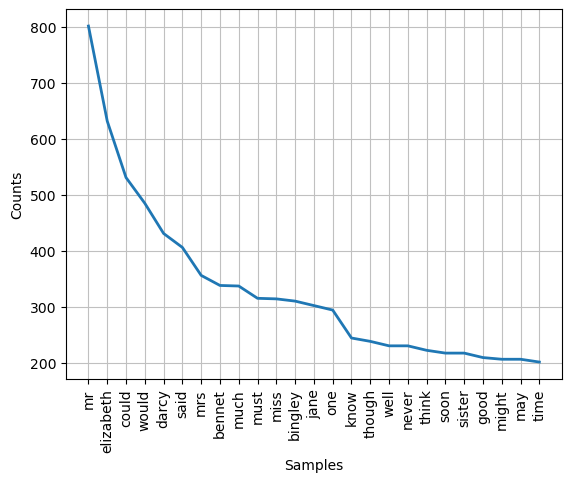

<Axes: xlabel='Samples', ylabel='Counts'>

In [12]:
# This command displays figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(25)


## 9. The most common word
<p>Nice! The frequency distribution plot above is the answer to our question. </p>
<p>The natural language processing skills we used in this notebook are also applicable to much of the data that Data Scientists encounter, as a vast proportion of the world's data is unstructured and includes a great deal of text. </p>
<p>So, what word turned out to (<em>not surprisingly</em>) be the most common word in Pride and Prejudice?</p>


In [14]:
# What's the most common word in Pride and Prejudice?
most_common_word = freqdist.max()
print(f"The most common word in Pride and Prejudice is: {most_common_word}")


The most common word in Pride and Prejudice is: mr
